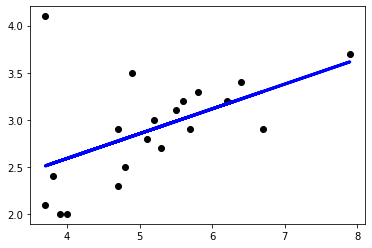

[2.32661263]
[4.16776475]
[4.43078648]
[6.79798206]


In [65]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

# cargar el csv desde github mediante pandas

url = 'https://raw.githubusercontent.com/EdiTomas/IA2/master/empleado.csv'

df = pd.read_csv(url)


# ingresar datos de entrenamiento
#Tasa de empleos del pais por metropolitano
x = np.array(df['Metropolitano']).reshape(-1, 1)  # Metropolitano
y = np.array(df['Total'])# Total de empleados por años en el pais

# entrenar el modelo y predecir
model = linear_model.LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

# graficar datos y predicción
# Tendecia de datos del total de empleado por años 

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.show()
print(model.predict([[3]])) #   3% al año 
print(model.predict([[10]])) # 10% al año
print(model.predict([[11]])) # 11% al año
print(model.predict([[20]])) # 20% al año















 2  Regresion Polinomial

     Tendencia de homicidios del pais por año .

     

RMSE:  328.34279157228275
R2:  0.8997689796074458


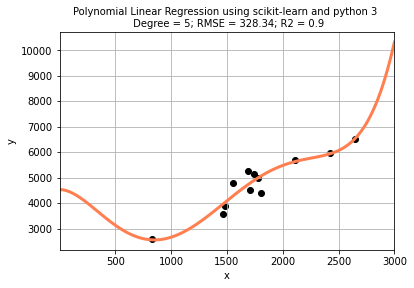

In [56]:
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("https://raw.githubusercontent.com/EdiTomas/IA2/master/HporDepto.csv")


x = np.asarray(df['Guatemala']).reshape(-1,1)
y = df['Republica']

#x = np.asarray(df['Guatemala']).reshape(-1,1)
#y = df['Anio']


#print(x)
#print(y)

nb_degree = 5
polynomial_features = PolynomialFeatures(degree = nb_degree)
#print(X)
X_TRANSF = polynomial_features.fit_transform(x)

#----------------------------------------------------------------------------------------#
# Step 3: define and train a model

model = linear_model.LinearRegression()

model.fit(X_TRANSF, y)

#----------------------------------------------------------------------------------------#
# Step 4: calculate bias and variance

Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(y,Y_NEW))
r2 = r2_score(y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

#----------------------------------------------------------------------------------------#
# Step 5: prediction

x_new_min = 1.0
x_new_max = 3000

X_NEW = np.linspace(x_new_min, x_new_max,100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)



Y_NEW = model.predict(X_NEW_TRANSF)

#Y_NEW =Y_NEW+Y_NEW*np.sin(Y_NEW)

#print(Y_NEW)
plt.scatter(x, y,  color='black')
plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
#plt.ylim(0,600000)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()

#Tendencia de Homicidios por Años  en pais 



3. Árbol de decisión
   Datos de cuanta superficie de bosque corresponde a cada habitante.



Depto:   [ 38 280 193 309 311 320 140 299 248 217 106  14  34  21  75 269 160 166
 239 159  50  76  59 203 155  29 213 233  41 267 313 147 150 145 276   0
 326 171 141 331  66  32 209 219  96  16 132  69  47 158 202  86  79 121
 169 190  61 263 264 179  68 283 100 304 113 317 102  78 205  90 138 262
 126 303  80 274 212 214 136  30 247 117 253 223 258  35  74   5 325 324
 148  83  24 111  52 125 251  91 306  89 268 103 100 238 254 318 215 282
 237  40 261 314  46 220 177 260  11   2 256 201 293 266 321 149 154 109
  60 120 108  92 252 229 230 188 119 114  98  63 272   1   7 327   8  94
  56 330  42  93  49 122 142 206 156  72 205 186 170 103 196 265  55 228
 298 116 151 107  58 157 167 131 189 300  13  15 243 222 236  45 234   3
  18  84 332  39 198  62  37  82  73 101 137 281  28  31 329  22  27 146
 178 249  53 218  97 124 172 322 165 184  17  26  88 134 161 259 278 235
 195 174  23 129  57   6  95 143 307 296 294 185 226 285 110 290  36 240
   4 176 270 231 253 181  43 241  48 308 3

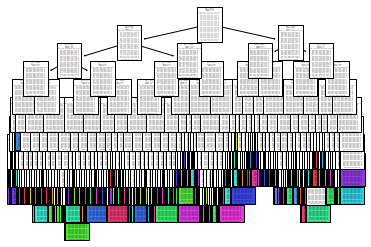

In [77]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("https://raw.githubusercontent.com/EdiTomas/IA2/master/Bosque.csv")
# Data creation
Depto = df['Departamento']
Muni = df['Municipio']
C10 = df['C10']
C16 = df['C16']
CMN = df['CMN']
CA = df['CA']
TA = df['TA']

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.


Depto_encoded = le.fit_transform(Depto) #Label
Muni_encoded = le.fit_transform(Muni)
C10_encoded = le.fit_transform(C10)#Cobertura 2010
C16_encoded = le.fit_transform(C16)#Cobertura 2016
CMN_encoded = le.fit_transform(CMN)#Cambio Neto
CA_encoded = le.fit_transform(CA) #Cambio Anual
TA_encoded = le.fit_transform(TA)#Tasa Anual 

print ("Depto:  ",Depto_encoded)#LABEL


# Combinig attributes into single listof tuples
features=list(zip(Muni_encoded,C10_encoded,C16_encoded,CMN_encoded,CA_encoded,TA_encoded))
print (features)

# fit the model
clf = DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='random').fit(features, Depto_encoded)
plot_tree(clf, filled=True)
plt.show()

4 Método de Bayes
Datos de cuanta superficie de bosque corresponde a cada habitante.
Para predecir los valores con este metodo.



In [81]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/EdiTomas/IA2/master/Bosque.csv")
# Data creation

Depto = df['Departamento']
Muni = df['Municipio']
C10 = df['C10']
C16 = df['C16']
CMN = df['CMN']
CA = df['CA']
TA = df['TA']



# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.


Depto_encoded = le.fit_transform(Depto) #Label
Muni_encoded = le.fit_transform(Muni)
C10_encoded = le.fit_transform(C10)#Cobertura 2010
C16_encoded = le.fit_transform(C16)#Cobertura 2016
CMN_encoded = le.fit_transform(CMN)#Cambio Neto
CA_encoded = le.fit_transform(CA) #Cambio Anual
TA_encoded = le.fit_transform(TA)#Tasa Anual 
print ("Depto:  ",Depto_encoded)#LABEL


# Combinig attributes into single listof tuples
features=list(zip(Muni_encoded,C10_encoded,C16_encoded,CMN_encoded,CA_encoded,TA_encoded))

# Create and fit the model
model = GaussianNB()
model.fit(features, Depto_encoded)

# Predict the output (first line = sunny, hot, high, false; must be 0 or N)
# predicted = model.predict([[2, 1, 0, 0]]) 
predicted = model.predict(features) 
print("---------------------------------------------------------------------",)
print("Predicted value:", predicted)

Depto:   [ 38 280 193 309 311 320 140 299 248 217 106  14  34  21  75 269 160 166
 239 159  50  76  59 203 155  29 213 233  41 267 313 147 150 145 276   0
 326 171 141 331  66  32 209 219  96  16 132  69  47 158 202  86  79 121
 169 190  61 263 264 179  68 283 100 304 113 317 102  78 205  90 138 262
 126 303  80 274 212 214 136  30 247 117 253 223 258  35  74   5 325 324
 148  83  24 111  52 125 251  91 306  89 268 103 100 238 254 318 215 282
 237  40 261 314  46 220 177 260  11   2 256 201 293 266 321 149 154 109
  60 120 108  92 252 229 230 188 119 114  98  63 272   1   7 327   8  94
  56 330  42  93  49 122 142 206 156  72 205 186 170 103 196 265  55 228
 298 116 151 107  58 157 167 131 189 300  13  15 243 222 236  45 234   3
  18  84 332  39 198  62  37  82  73 101 137 281  28  31 329  22  27 146
 178 249  53 218  97 124 172 322 165 184  17  26  88 134 161 259 278 235
 195 174  23 129  57   6  95 143 307 296 294 185 226 285 110 290  36 240
   4 176 270 231 253 181  43 241  48 308 3